**Installing The Required Libraries**

In [132]:
from collections import Counter
from matplotlib import style
style.use('ggplot')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Agba
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Installing TextBlob**

In [133]:
!pip install TextBlob

In [134]:
from textblob import TextBlob

**Importing Dataset**

In [135]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head(10)

<IPython.core.display.Javascript object>

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


**Generating (verified_reviews) polaratity column With TextBlob** 

In [136]:
pol = lambda x: TextBlob(x).sentiment.polarity
df['polarity']=df['verified_reviews'].apply(pol)
df.head(10)

,rating,date,variation,verified_reviews,feedback,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.625000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.875000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.100000
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.350000
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000000
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0.294643
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0.216667
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0.200000
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.800000
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0.988281


**Generating The Review Lenght Column**

In [137]:
df['review_lenght'] = df.verified_reviews.str.len()
df.head(10)

,rating,date,variation,verified_reviews,feedback,polarity,review_lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.625000,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.875000,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.100000,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.350000,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000000,5
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,0.294643,172
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,0.216667,365
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,0.200000,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,0.800000,11
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,0.988281,114


**Exploratory Data Analysis**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            3150 non-null   int64  
 1   date              3150 non-null   object 
 2   variation         3150 non-null   object 
 3   verified_reviews  3150 non-null   object 
 4   feedback          3150 non-null   int64  
 5   polarity          3150 non-null   float64
 6   review_lenght     3150 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 172.4+ KB


In [139]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
polarity            0
review_lenght       0
dtype: int64

In [140]:
df.describe()

,rating,feedback,polarity,review_lenght
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,0.349786,132.049524
std,1.068506,0.273778,0.303308,182.099952
min,1.000000,0.000000,-1.000000,1.000000
25%,4.000000,1.000000,0.123852,30.000000
50%,5.000000,1.000000,0.350000,74.000000
75%,5.000000,1.000000,0.533333,165.000000
max,5.000000,1.000000,1.000000,2851.000000


<IPython.core.display.Javascript object>

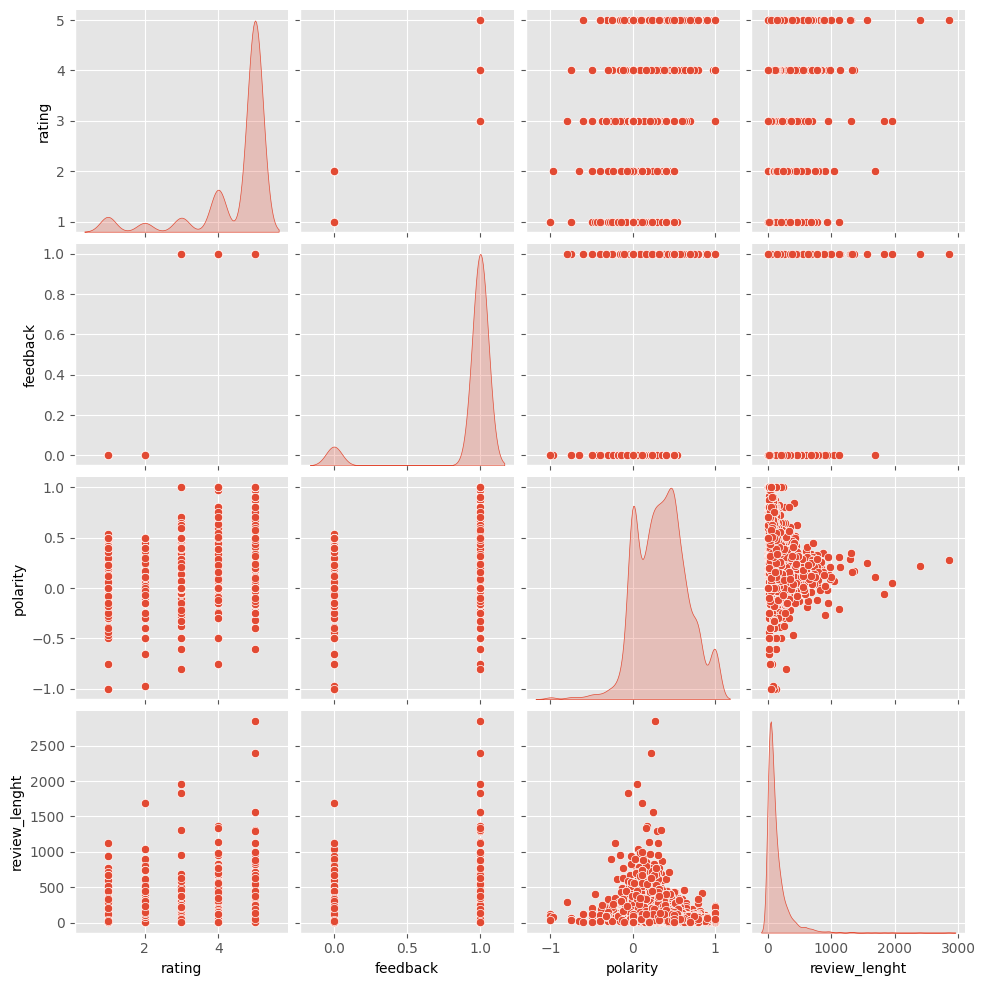

In [141]:
sns.pairplot(data=df, diag_kind='kde')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

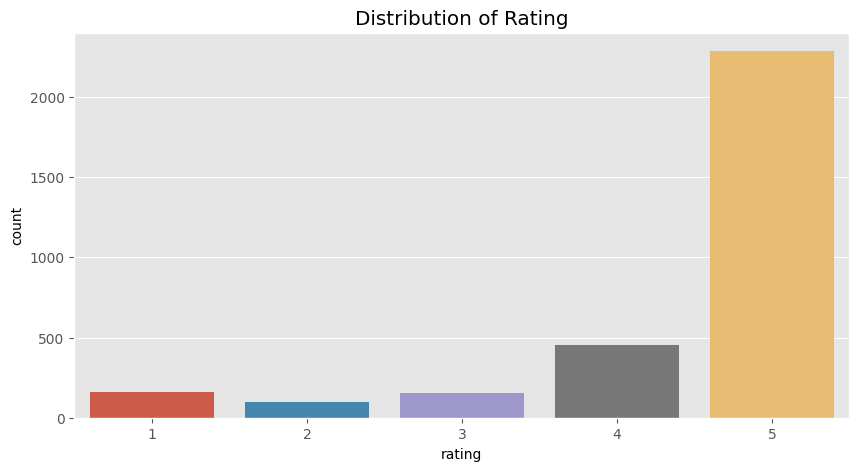

In [142]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Rating")
sns.countplot(x='rating', data =df)
plt.show()

In [143]:
df.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

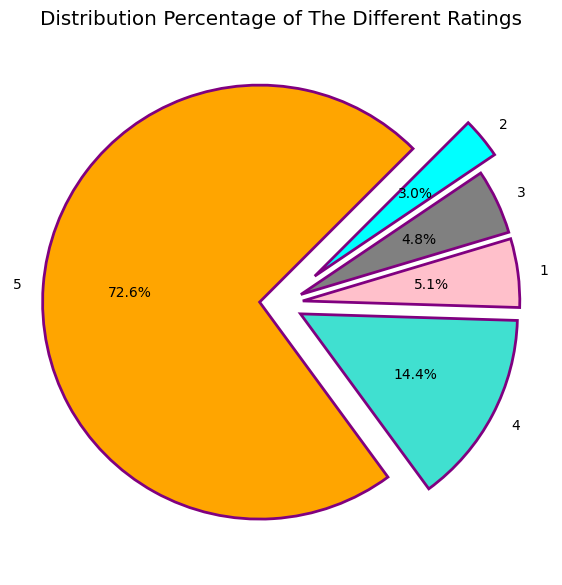

In [144]:
fig = plt.figure(figsize=(7,9))
colors = ("orange", "turquoise", "pink","gray","cyan")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.rating.value_counts()
explode = (0.1, 0.1, 0.1, 0.1,0.2)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Distribution Percentage of The Different Ratings")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

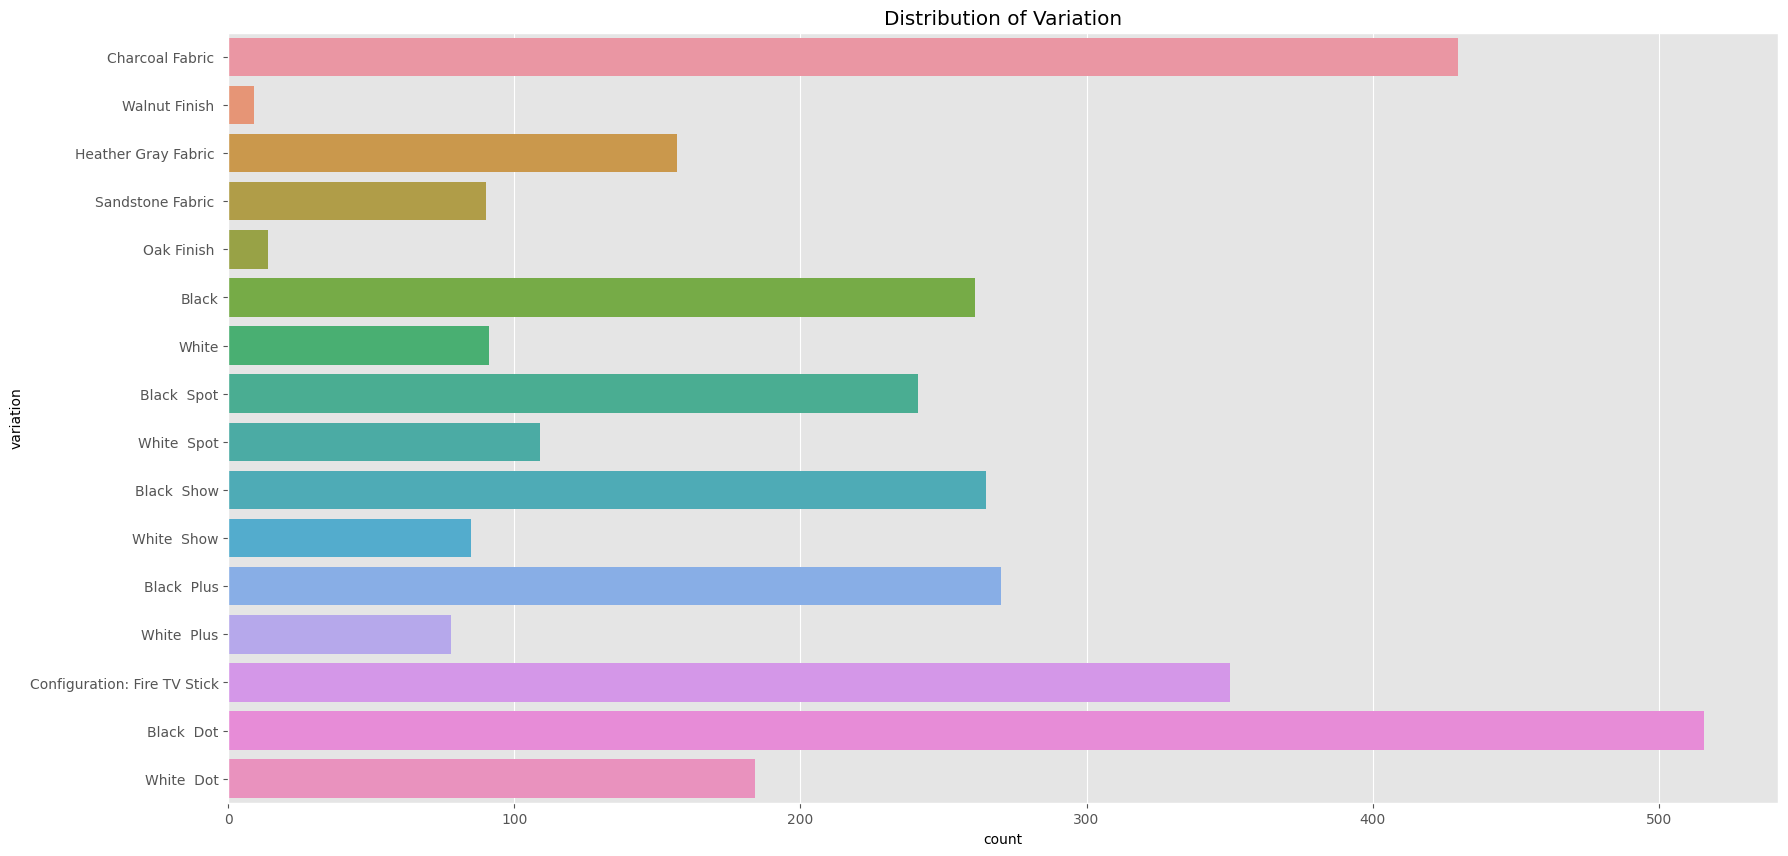

In [145]:
fig = plt.figure(figsize=(20,10))   
sns.countplot(y='variation', data=df)
plt.title("Distribution of Variation")
plt.show()

In [146]:
df.variation.value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

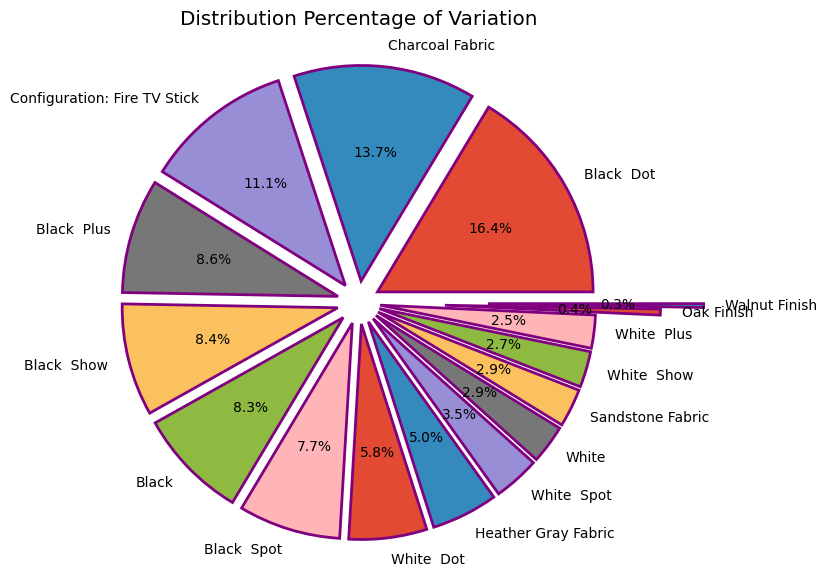

In [147]:
fig = plt.figure(figsize=(7,7))
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.variation.value_counts()
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.4,0.6)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, startangle=0,
          wedgeprops = wp, label='', explode = explode)
plt.title("Distribution Percentage of Variation")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

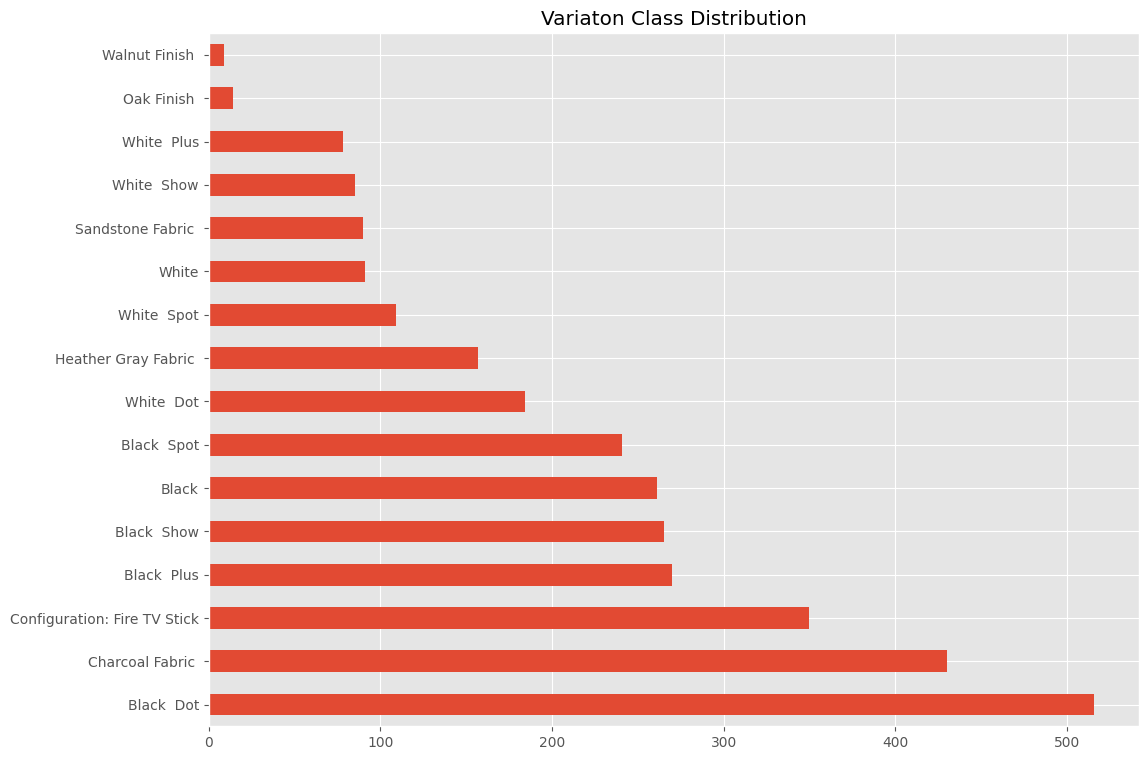

In [148]:
df.variation.value_counts().plot.barh(figsize=(12,9))
plt.title('Variaton Class Distribution')
plt.show()

In [149]:
df[df['variation']=='Black  Dot']['rating'].value_counts()

5    362
4     84
3     34
1     22
2     14
Name: rating, dtype: int64

In [150]:
df[df['variation']=='Charcoal Fabric ']['rating'].value_counts()

5    352
4     56
3     10
2      8
1      4
Name: rating, dtype: int64

In [151]:
df[df['variation']=='Walnut Finish ']['rating'].value_counts()

5    8
4    1
Name: rating, dtype: int64

In [152]:
df[df['variation']=='Black  Dot']['feedback'].value_counts()

1    480
0     36
Name: feedback, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

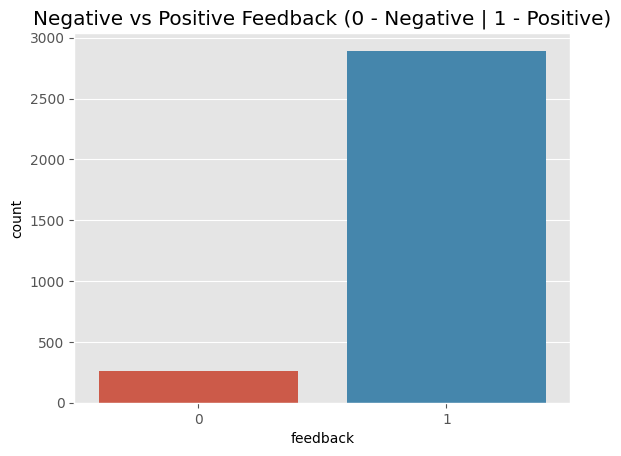

1    2893
0     257
Name: feedback, dtype: int64

In [153]:
sns.countplot(x='feedback', data=df)
plt.title('Negative vs Positive Feedback (0 - Negative | 1 - Positive)')
plt.show()

df['feedback'].value_counts()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

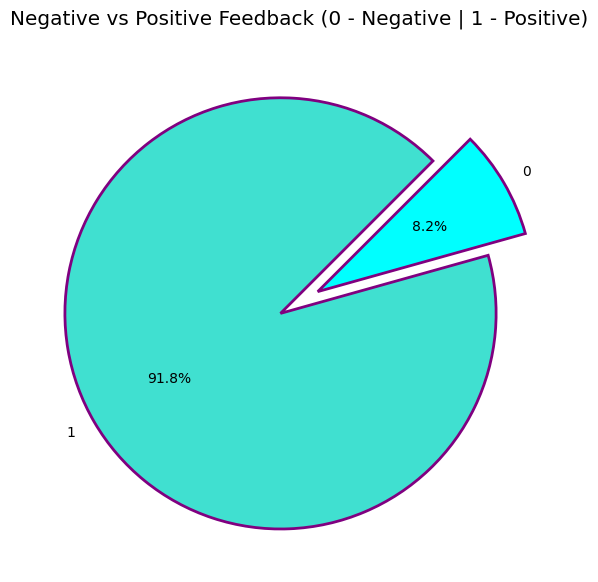

In [154]:
fig = plt.figure(figsize=(7,7))
colors = ("turquoise", "cyan")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.feedback.value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Negative vs Positive Feedback (0 - Negative | 1 - Positive)")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

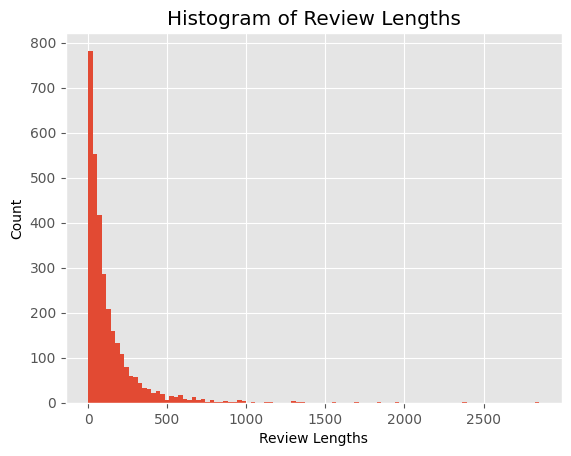

In [155]:
plt.hist(df['review_lenght'], bins=100)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Lengths')
plt.ylabel('Count')
plt.show()

In [156]:
for i in range(10):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['polarity'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

0.625 

1 

Loved it! 

0.875 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

-0.1 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

0.35 

1 

Music 

0.0 

1 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. 

0.29464285714285715 

1 

Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to

In [157]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+https\S+",'', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]', '',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [158]:
df.verified_reviews = df['verified_reviews'].apply(data_processing)

In [159]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Agba
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [161]:
 df['verified_reviews'] = df['verified_reviews'].apply(lambda x:stemming(x))

In [162]:
for i in range(10):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")
    print(df['polarity'].iloc[i], "\n")

love echo 

1 

0.625 

loved 

1 

0.875 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

-0.1 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

0.35 

music 

1 

0.0 

received echo gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else 

1 

0.29464285714285715 

without cellphone use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet 

1 

0.21666666666666667 

think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house 

1 

0.2 

looks great 

1 

0.8 

love ive listened songs havent heard since childhood get news weather information great 

1 

0.98828125 



In [163]:
wf = Counter(df.verified_reviews)
wf

Counter({'love echo': 5,
         'loved': 3,
         'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home': 1,
         'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well': 1,
         'music': 1,
         'received echo gift needed another bluetooth something play music easily accessible found smart speaker cant wait see else': 2,
         'without cellphone use many features ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response seem smartbon politics yet': 2,
         'think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house': 2,
         'looks great': 2,
         'love ive listened songs havent heard since childhood get news weather information great': 2,
         'sent 85 year o

In [164]:
df.head(5)

,rating,date,variation,verified_reviews,feedback,polarity,review_lenght
0,5,31-Jul-18,Charcoal Fabric,love echo,1,0.625,13
1,5,31-Jul-18,Charcoal Fabric,loved,1,0.875,9
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,-0.100,195
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1,0.350,172
4,5,31-Jul-18,Charcoal Fabric,music,1,0.000,5


In [165]:
pos_reviews = df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback,polarity,review_lenght
0,5,31-Jul-18,Charcoal Fabric,love echo,1,0.625,13
1,5,31-Jul-18,Charcoal Fabric,loved,1,0.875,9
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,-0.100,195
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1,0.350,172
4,5,31-Jul-18,Charcoal Fabric,music,1,0.000,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Most Frequently Used Words In Positive Review')

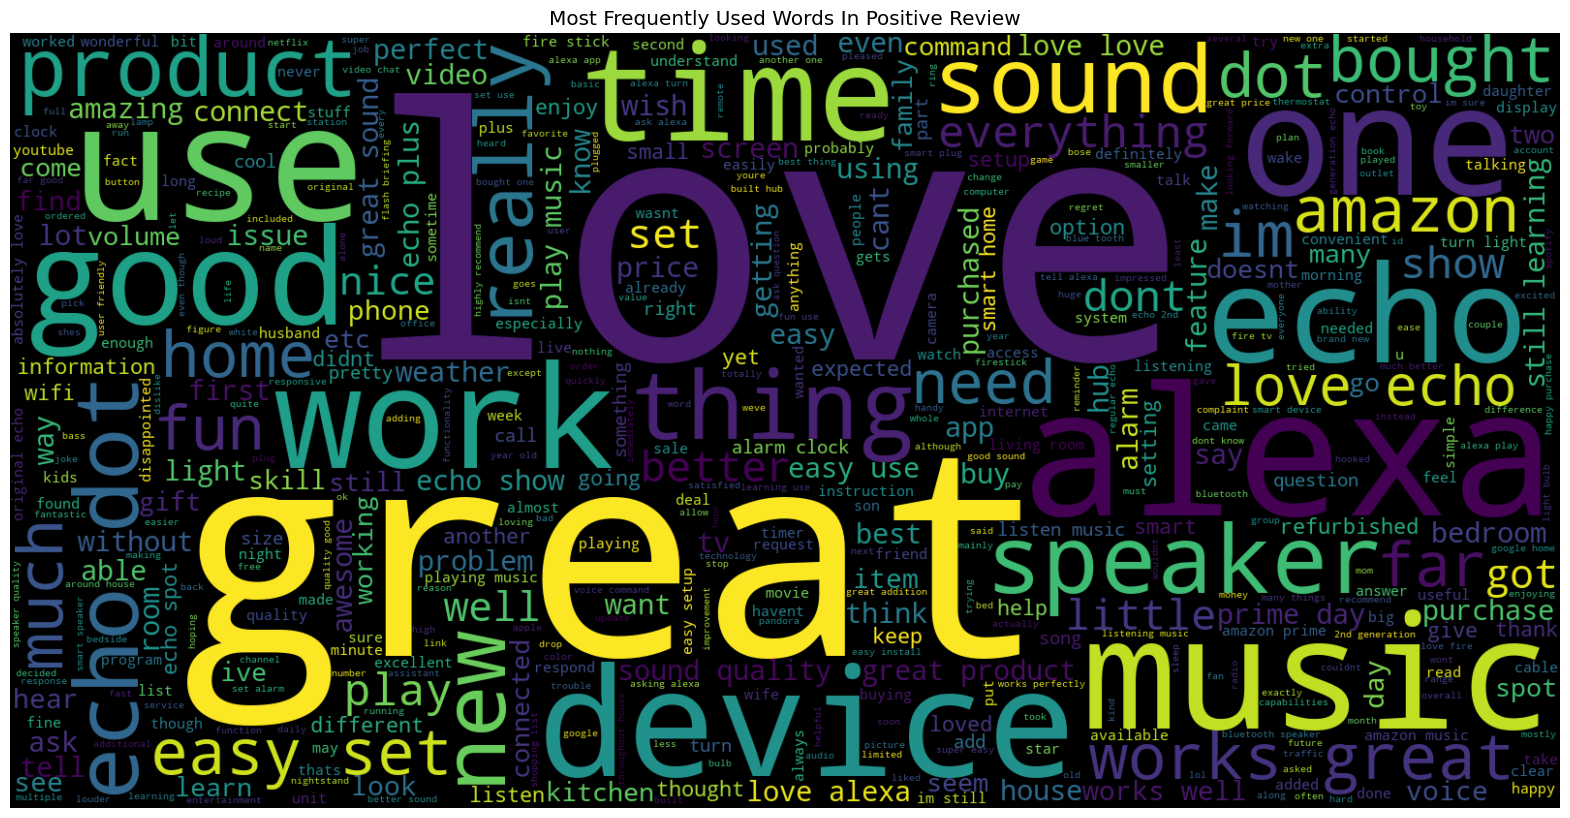

In [166]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,155), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words In Positive Review')

In [167]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback,polarity,review_lenght
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0,0.450000,163
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0,0.033333,53
141,1,30-Jul-18,Charcoal Fabric,much features,0,-0.100000,18
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0,0.300000,87
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0,-0.650000,20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Most Frequently Used Words In Negative Review')

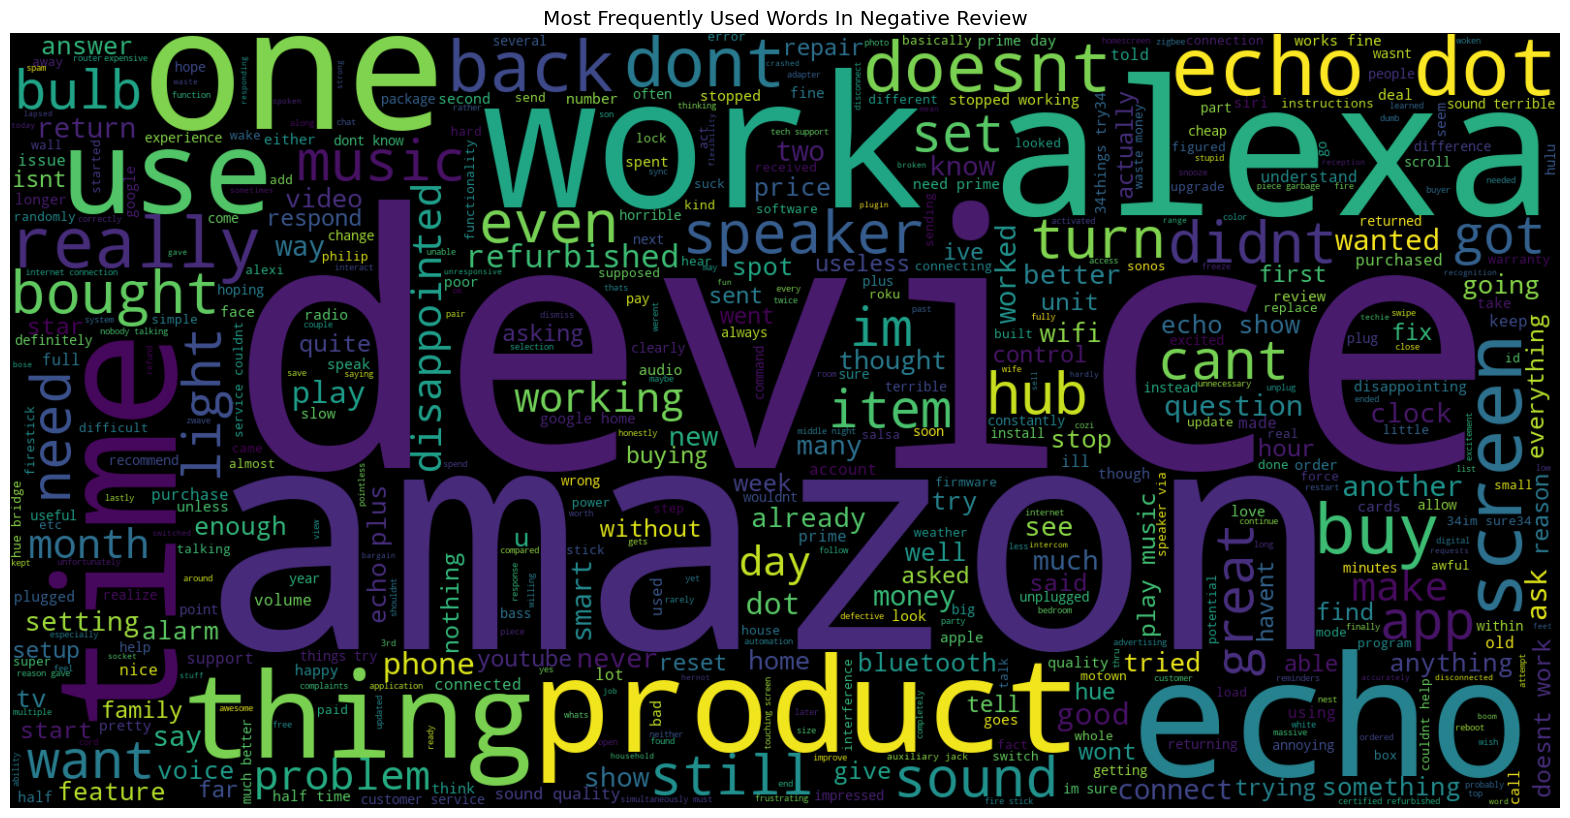

In [168]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,155), facecolor=None)
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words In Negative Review')

In [169]:
df.corr()

,rating,feedback,polarity,review_lenght
rating,1.000000,0.861968,0.415672,-0.193067
feedback,0.861968,1.000000,0.338949,-0.136186
polarity,0.415672,0.338949,1.000000,-0.200309
review_lenght,-0.193067,-0.136186,-0.200309,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

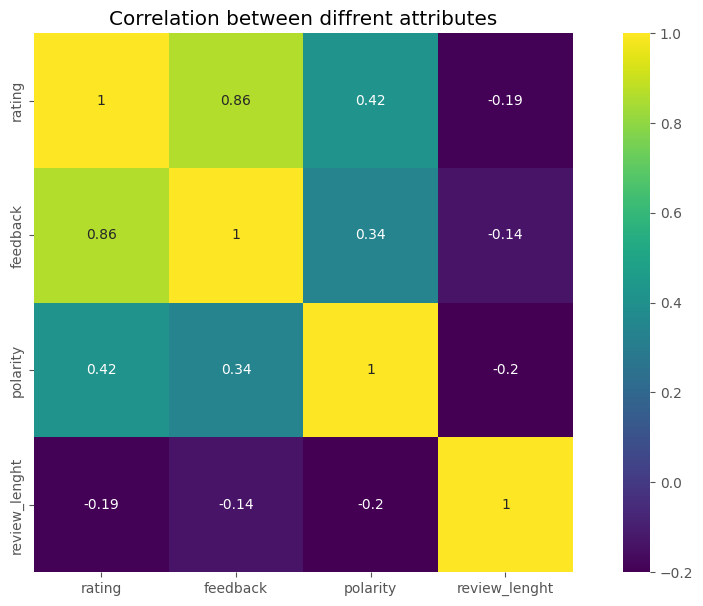

In [170]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between diffrent attributes')
plt.show()

**Model Building**

In [171]:
x = df.verified_reviews
y = df.feedback

In [172]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['verified_reviews'])

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [174]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (2205, 4364)
Size of y_train: (2205,)
Size of x_test: (945, 4364)
Size of y_test: (945,)


In [175]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Training The Model With SVM**

In [176]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 94.18%


In [177]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 35  53]
 [  2 855]]


              precision    recall  f1-score   support

           0       0.95      0.40      0.56        88
           1       0.94      1.00      0.97       857

    accuracy                           0.94       945
   macro avg       0.94      0.70      0.76       945
weighted avg       0.94      0.94      0.93       945



**Training The Model With DEEP LEARNING**

In [178]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [179]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['verified_reviews'])
x = tokenizer.texts_to_sequences(df['verified_reviews'])
x = pad_sequences(x)
x

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 175],
       [  0,   0,   0, ...,  71, 260,  21],
       ...,
       [  0,   0,   0, ...,  86,  45,  28],
       [  0,   0,   0, ..., 111, 122, 107],
       [  0,   0,   0, ...,   0,   0,  14]])

In [180]:
x.shape

(3150, 145)

In [181]:
y = df['feedback']

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [183]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (2205, 145)
Size of y_train: (2205,)
Size of x_test: (945, 145)
Size of y_test: (945,)


In [184]:
model = Sequential()
model.add(Embedding(500, 120, input_length= x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 145, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 145, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                47360     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 107,425
Trainable params: 107,425
Non-trainable params: 0
_________________________________________________________________
None
